In [39]:
import pandas as pd 


In [40]:
dataframe=pd.read_csv("bisiklet.csv")

In [41]:
dataframe.head()  # eğitimde bu dosyayı bulamadım -bende gemini den üretmesini istesim üretilen veride fiyat en başta olması gerekirken
#bende en sondaydı bunu düzeltemlim

,ozellik1,ozellik2,fiyat
0,1752.114587,1758.451236,954.8745
1,1755.987412,1751.235478,1205.4578
2,1750.145874,1759.854712,850.1245
3,1758.951235,1753.658741,1457.9854
4,1754.785412,1750.124578,987.4512


In [42]:
fiyat=dataframe["fiyat"] #fiyat kolonunu aldık 

In [43]:
fiyat

0      954.8745
1     1205.4578
2      850.1245
3     1457.9854
4      987.4512
        ...    
91     915.7741
92    1245.9985
93     842.1124
94    1475.5587
95     780.8899
Name: fiyat, Length: 96, dtype: float64

In [44]:
dataframe.drop("fiyat",axis=1,inplace=True ) # fiyat kolonunu sildik en sondan 

In [45]:
dataframe

,ozellik1,ozellik2
0,1752.114587,1758.451236
1,1755.987412,1751.235478
2,1750.145874,1759.854712
3,1758.951235,1753.658741
4,1754.785412,1750.124578
...,...,...
91,1756.552147,1753.220145
92,1751.336985,1757.889541
93,1758.112458,1750.445587
94,1754.998541,1755.111245


In [46]:
dataframe =pd.concat([fiyat,dataframe],axis=1) # fiyat kolonunu başa ekledik 

In [47]:
dataframe

,fiyat,ozellik1,ozellik2
0,954.8745,1752.114587,1758.451236
1,1205.4578,1755.987412,1751.235478
2,850.1245,1750.145874,1759.854712
3,1457.9854,1758.951235,1753.658741
4,987.4512,1754.785412,1750.124578
...,...,...,...
91,915.7741,1756.552147,1753.220145
92,1245.9985,1751.336985,1757.889541
93,842.1124,1758.112458,1750.445587
94,1475.5587,1754.998541,1755.111245


##### seaborn kütüphanesi ile  görselleştirme işlemleri 

In [48]:
import seaborn as sbn
import matplotlib.pyplot as plt

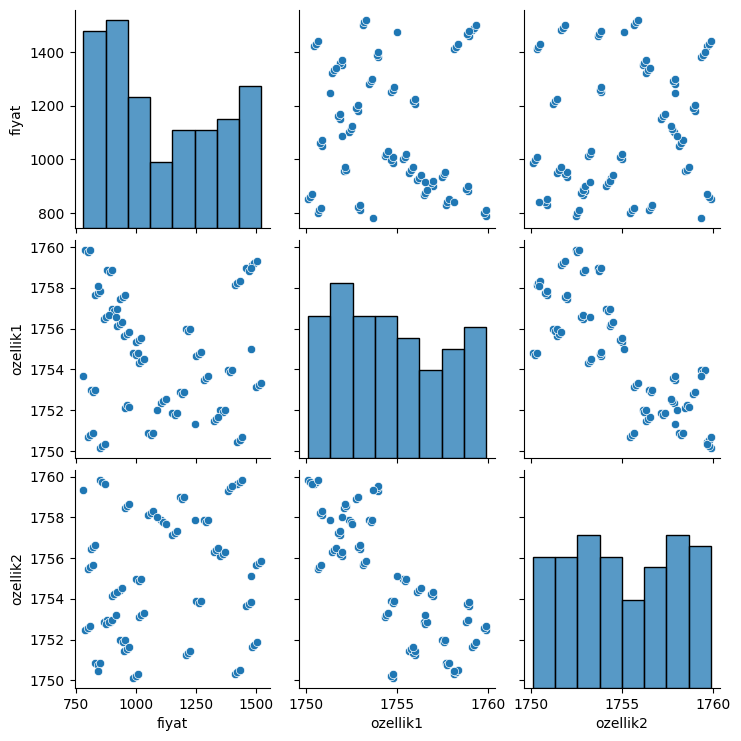

In [49]:
sbn.pairplot(dataframe)

### veriyi test/train olarak ikiye ayırma (istenen parça büyüklüğünde örn :  0.3 0.7 gibi)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
### bizden diziler ister bu metod   

### train_test_split    y=wx + b formülünü unutmamalıyız 
y= label=ulaşılmak istenen sonuç
x=feature=özellik 

In [52]:

y=dataframe["fiyat"].values # .values ile numpy dizisi olarak aldık
x=dataframe[["ozellik1","ozellik2"]].values  #eğer .values olmasaydı dataframe 

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)





##### kaç tane veri olduğuna bakalım  .shape ile 

In [54]:
x_train.shape 

(64, 2)

In [55]:
x_test.shape

(32, 2)

In [56]:
y_train.shape

(64,)

In [57]:
y_test.shape

(32,)


## veri normalizasyonu
#### scaling 

In [58]:
 #  veri değerlerini 0 1 arasına alma işlemleri 

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler =MinMaxScaler()

In [61]:
scaler.fit(x_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [62]:
x_train=scaler.transform(x_train)

In [63]:
x_test=scaler.transform(x_test)

In [64]:
x_train  #veriler arasına getirildi

array([[0.79280029, 0.07704145],
       [0.89721069, 0.29410572],
       [0.98972107, 0.24997712],
       [0.3267368 , 0.58907612],
       [0.89481806, 0.37334109],
       [0.66936615, 0.28250339],
       [0.84068335, 0.04077187],
       [0.4988023 , 0.51228513],
       [0.36178888, 0.94590906],
       [0.6248258 , 0.44142265],
       [0.05263029, 1.        ],
       [0.16740658, 0.72938988],
       [0.18929443, 0.61638582],
       [0.47689492, 0.02054619],
       [0.17768551, 0.73966298],
       [0.28047482, 0.91049153],
       [0.47415342, 0.37496126],
       [0.        , 0.9995861 ],
       [0.13486174, 0.63661149],
       [0.47689492, 0.        ],
       [0.2384712 , 0.78379055],
       [0.65849639, 0.3180106 ],
       [0.58722166, 0.15751914],
       [0.88693176, 0.28383262],
       [0.28047482, 0.91049153],
       [0.44976327, 0.3287391 ],
       [0.24875013, 0.77351746],
       [0.06461727, 0.83212085],
       [0.7030314 , 0.41092388],
       [0.78252136, 0.06676835],
       [0.

#### tensorflow kullanımı 

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #model için 
from tensorflow.keras.layers import Dense  #katmanlar için 

In [66]:

model=Sequential()

In [87]:
model.add(Dense(8,activation="relu")) #katmanların eklenmesi 5 nöronlu 
model.add(Dense(7,activation="relu"))
model.add(Dense(5,activation="relu"))

In [88]:
model.add(Dense(1))  #çıktı katmanı 

In [89]:
model.compile(optimizer ="rmsprop",loss="mse") #modeli oluşturur / optimizer "adam" daha iyi çalışan bir yöntem olabilir 

#### Train etme işlemeleri

In [90]:
### eğer veri sayısı çok fazla ise tek seferde verilerin hepisni vermek yerine parça parça vermek gerekebilir   batch_size

In [91]:
model.fit(x_train,y_train,epochs=250, batch_size=2 )


Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1229242.0000
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1227468.7500
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1225458.7500
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1223162.5000
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1220490.8750
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1217408.0000
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1213906.1250
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1209827.2500
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1205226.3750
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1199869.7500
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1193698.0000
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1186655.5000
Epoch 13/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1178692.6250
Epoch 14/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

In [92]:
loss=model.history.history["loss"]

In [93]:
#çizdirelim 

<Axes: >

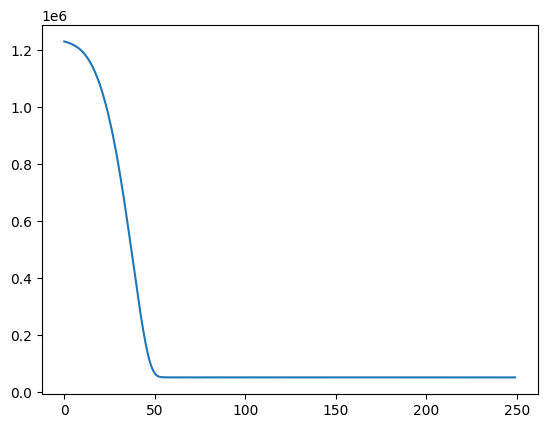

In [94]:
sbn.lineplot( x=range(len(loss)),y=loss )

In [96]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [97]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [98]:
trainLoss

50273.04296875

In [99]:
testLoss

60846.17578125